# **Customer Churn Prediction using ANN**




In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [17]:
df = pd.read_csv('Churn_Modelling.csv')

In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
df.shape

(10000, 14)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [23]:
df['Geography'].value_counts()


,count
Geography,
France,5014
Germany,2509
Spain,2477


In [24]:
df['Gender'].value_counts()


,count
Gender,
Male,5457
Female,4543


In [25]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)


In [26]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)
df = df.astype(int)


In [28]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [29]:
from sklearn.model_selection import train_test_split


In [31]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [32]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,1
9997,709,36,7,0,1,0,1,42085,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,0,1


In [33]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [36]:
X_train_trf

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [53]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [56]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6719 - loss: 0.6198 - val_accuracy: 0.8012 - val_loss: 0.4799
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7990 - loss: 0.4661 - val_accuracy: 0.8081 - val_loss: 0.4455
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8042 - loss: 0.4430 - val_accuracy: 0.8125 - val_loss: 0.4385
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8144 - loss: 0.4251 - val_accuracy: 0.8131 - val_loss: 0.4347
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8169 - loss: 0.4122 - val_accuracy: 0.8138 - val_loss: 0.4300
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.4247 - val_accuracy: 0.8163 - val_loss: 0.4267
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.4136 - val_accuracy: 0.8156 - val_loss: 0.4231
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.4026 - val_accu

In [57]:
model.layers[1].get_weights()
#

[array([[-0.68236995, -0.00442303,  0.21344347, -0.506724  ,  0.47997683,
         -0.12267489,  0.2116588 , -0.14643116,  0.22555605, -0.32192627,
         -0.22528099],
        [ 0.36083362,  0.75995946, -0.06991248,  0.938308  ,  0.5059395 ,
          0.18239897,  0.4209431 ,  0.8626043 ,  0.1358917 ,  0.34962368,
          0.01580783],
        [-0.02797925, -0.21696317, -0.21057776, -0.778384  ,  0.30294418,
          0.00908414,  0.49364668, -0.00705525,  0.3138391 ,  0.7207112 ,
         -0.5888349 ],
        [ 0.6209504 ,  0.08776215,  0.6446184 ,  0.72475785, -0.80714154,
         -0.5220058 , -0.47829103, -0.43103838,  0.11757308, -0.8273612 ,
          0.12580766],
        [-0.36113253,  0.07286289, -0.24264818,  0.11520547,  0.54316705,
          0.19775385,  0.59164363,  0.0193668 , -0.0703856 ,  0.411599  ,
          0.5285314 ],
        [ 0.5787844 , -0.00242491,  0.1493449 , -0.5037514 , -0.1213811 ,
          0.03641442,  0.27912566, -0.77115494, -0.7782246 ,  0.3238611

In [58]:
y_pred = model.predict(X_test_trf)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [59]:
y_pred


array([[0.22549573],
       [0.26047477],
       [0.12036734],
       ...,
       [0.10546708],
       [0.16625038],
       [0.21058418]], dtype=float32)

In [60]:
y_log = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [61]:
y_pred=np.where(y_log>0.5,1,0)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8595

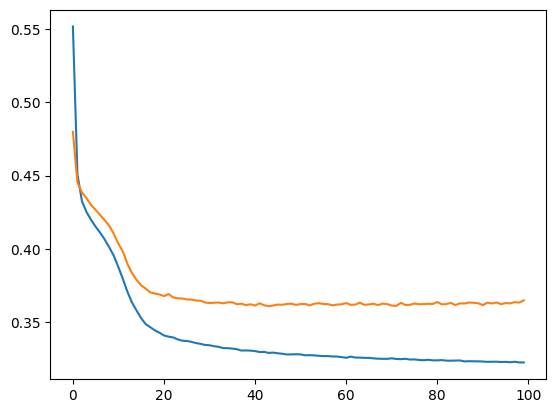

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


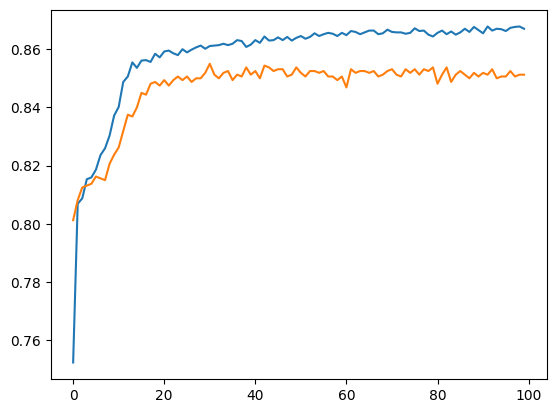

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])